In [ ]:
!pip install -U git+https://github.com/scikit-fuzzy/scikit-fuzzy.git

  Cloning https://github.com/scikit-fuzzy/scikit-fuzzy.git to /tmp/pip-req-build-gj0u9_hh
  Running command git clone --filter=blob:none -q https://github.com/scikit-fuzzy/scikit-fuzzy.git /tmp/pip-req-build-gj0u9_hh
  Resolved https://github.com/scikit-fuzzy/scikit-fuzzy.git to commit 92ad3c382ac19707086204ac6cdf6e81353345a7
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [ ]:
import skfuzzy
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# fuzzification

In [ ]:
# 4 antecedent

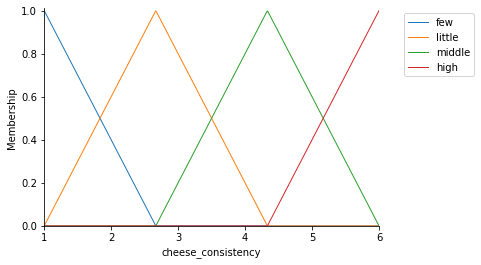

In [ ]:
cheese_consistency_range = np.arange(1, 6.01, 0.01)#Define domain
cheese_consistency = ctrl.Antecedent(cheese_consistency_range, 'cheese_consistency')
cheese_consistency_name = ['few', 'little', 'middle', 'high']
cheese_consistency.automf(names=cheese_consistency_name)#Membership function
cheese_consistency.view()
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')#Visualization of membership function

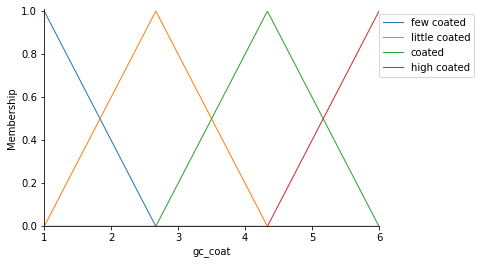

In [ ]:
gc_coat_range = np.arange(1, 6.01, 0.01)#Define domain
gc_coat = ctrl.Antecedent(gc_coat_range, 'gc_coat')
gc_coat_name = ['few coated', 'little coated', 'coated', 'high coated']
gc_coat.automf(names=gc_coat_name)#Membership function
gc_coat.view()
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')#Visualization of membership function

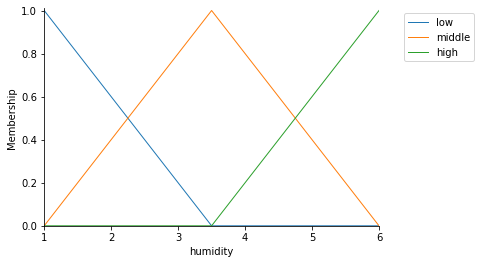

In [ ]:
humidity_range = np.arange(1, 6.01, 0.01)#Define domain
humidity = ctrl.Antecedent(humidity_range, 'humidity')
humidity_name = ['low', 'middle', 'high']
humidity.automf(names=humidity_name)#Membership function
humidity.view()
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')#Visualization of membership function

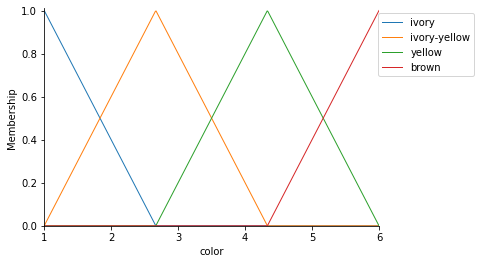

In [ ]:
color_range = np.arange(1, 6.01, 0.01)#Define domain
color = ctrl.Antecedent(color_range, 'color')
color_name = ['ivory', 'ivory-yellow', 'yellow', 'brown']
color.automf(names=color_name)#Membership function
color.view()
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')#Visualization of membership function

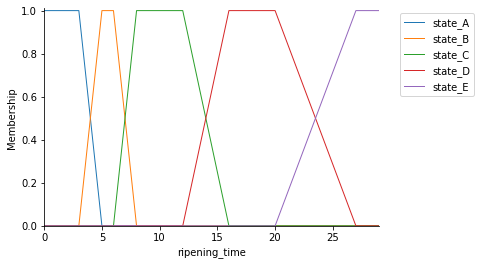

In [ ]:
#Define domain
# 1 consequent
ripening_time_range = np.arange(0,30,1)
ripening_time = ctrl.Consequent(ripening_time_range, 'ripening_time')
ripening_time['state_A'] = skfuzzy.trapmf(ripening_time.universe, [0, 0, 3, 5])#Membership function
ripening_time['state_B'] = skfuzzy.trapmf(ripening_time.universe, [3, 5, 6, 8])#Membership function
ripening_time['state_C'] = skfuzzy.trapmf(ripening_time.universe, [6, 8, 12, 16])#Membership function
ripening_time['state_D'] = skfuzzy.trapmf(ripening_time.universe, [12, 16, 20, 27])#Membership function
ripening_time['state_E'] = skfuzzy.trapmf(ripening_time.universe, [20, 27, 30, 30])#Membership function

ripening_time.view()
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')#Visualization of membership function

In [ ]:
# Rule Application
rules = [
    ctrl.Rule(gc_coat['few coated'] & humidity['high'], ripening_time['state_A']),
    ctrl.Rule(cheese_consistency['few'] & gc_coat['little coated'] & humidity['middle'] , ripening_time['state_B']),
    ctrl.Rule(cheese_consistency['little'] & gc_coat['coated'], ripening_time['state_C']),
    ctrl.Rule(cheese_consistency['middle'] & gc_coat['high coated'], ripening_time['state_D']),
    ctrl.Rule(cheese_consistency['high'] & color['brown'], ripening_time['state_E']),
]

In [ ]:
# inference engine, we use high level api
# mamdani system, it use max min composition to do inference

In [ ]:
# Cheese ripening Simulation
cheese_ripening_ctrl = ctrl.ControlSystem(rules)#Aggregates the rules 
cheese_ripen = ctrl.ControlSystemSimulation(cheese_ripening_ctrl)

In [ ]:
# explain how it work

 Antecedents 
Antecedent: gc_coat                 = 3.5
  - few coated                      : 0.0
  - little coated                   : 0.5000000000000011
  - coated                          : 0.4999999999999989
  - high coated                     : 0.0
Antecedent: humidity                = 3
  - low                             : 0.20000000000000073
  - middle                          : 0.7999999999999994
  - high                            : 0.0
Antecedent: cheese_consistency      = 2
  - few                             : 0.40000000000000047
  - little                          : 0.5999999999999996
  - middle                          : 0.0
  - high                            : 0.0
Antecedent: color                   = 5
  - ivory                           : 0.0
  - ivory-yellow                    : 0.0
  - yellow                          : 0.6000000000000016
  - brown                           : 0.3999999999999978

 Rules 
RULE #0:
  IF gc_coat[few coated] AND humidity[high] THEN ripen

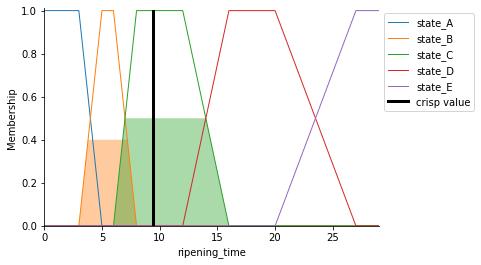

In [ ]:
cheese_ripen.input['cheese_consistency'] = 2
cheese_ripen.input['gc_coat'] = 3.5
cheese_ripen.input['humidity'] = 3
cheese_ripen.input['color'] = 5

cheese_ripen.compute()

ripening_time.view(sim=cheese_ripen)
plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')
f"Ripening time is {cheese_ripen.output['ripening_time']:.3f} days"
cheese_ripen.print_state()

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html

In [ ]:
# Cheese consistency Line scale from 1 to 6 with 3 anchors: 1 (few), 3 (middle), 6 (high), symbolic linguistic: Few Little Middle High
# Gc coat Line scale from 1 to 6 with 3 anchors: 1 (few coated), 3 (coated), 6 (high coated),symbolic linguistic: Few coated Little coated Coated High coated
# Humidity Line scale from 1 to 6 with 3 anchors:1 (dry), 3 (middle), 6 (humid),symbolic linguistic:Low Middle High
# Color Line scale from 1 to 6 with 3 anchors:1 (ivory), 3 (yellow), 6 (brown),symbolic linguistic:Ivory Ivory-yellow Yellow Brown


In [ ]:
def main():
    print('Please input cheese consistency with line scale from 1 to 6 :')
    input_cheese_consistency=float((input()))
    print('Please input Gc coat with line scale from 1 to 6  :')
    input_Gc=float((input()))
    print('Please input humidity with line scale from 1 to 6 :')
    input_humidity=float((input()))
    print('Please input cheese color with line scale from 1 to 6 :')
    input_color=float((input()))
    cheese_ripen.input['cheese_consistency'] = input_cheese_consistency
    cheese_ripen.input['gc_coat'] = input_Gc
    cheese_ripen.input['humidity'] = input_humidity
    cheese_ripen.input['color'] = input_color

    cheese_ripen.compute()

    ripening_time.view(sim=cheese_ripen)
    plt.legend(bbox_to_anchor=(0.7, 0.0, 0.6,1), loc='upper right')
    print(f"Ripening time is {cheese_ripen.output['ripening_time']:.3f} days")


Please input cheese consistency with line scale from 1 to 6 :


 1


Please input Gc coat with line scale from 1 to 6  :


 2


Please input humidity with line scale from 1 to 6 :


 3


Please input cheese color with line scale from 1 to 6 :


 4


Ripening time is 5.500 days


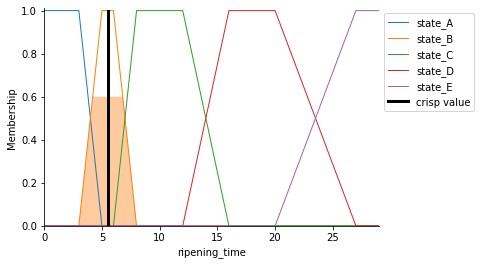

In [ ]:
main() # 1,2,3,4

Please input cheese consistency with line scale from 1 to 6 :


 4


Please input Gc coat with line scale from 1 to 6  :


 5


Please input humidity with line scale from 1 to 6 :


 6


Please input cheese color with line scale from 1 to 6 :


 6


Ripening time is 17.270 days


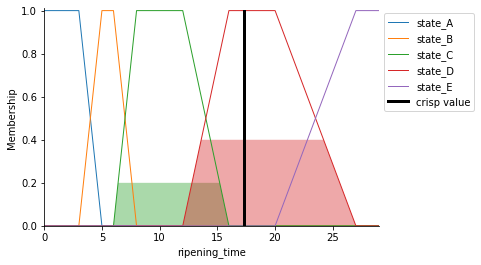

In [ ]:
main() # 4,5,6,6

Please input cheese consistency with line scale from 1 to 6 :


 3


Please input Gc coat with line scale from 1 to 6  :


 3


Please input humidity with line scale from 1 to 6 :


 3


Please input cheese color with line scale from 1 to 6 :


 3


Ripening time is 10.902 days


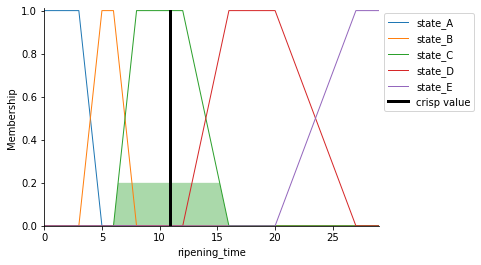

In [ ]:
main() # 3,3,3,3

Please input cheese consistency with line scale from 1 to 6 :


 2


Please input Gc coat with line scale from 1 to 6  :


 3


Please input humidity with line scale from 1 to 6 :


 3


Please input cheese color with line scale from 1 to 6 :


 5


Ripening time is 8.476 days


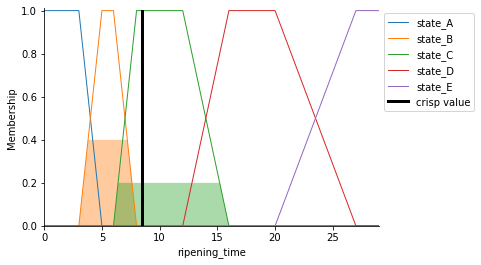

In [ ]:
main() # 2,3,3,5